In [36]:
import pandas as pd

In [19]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [37]:
df = pd.concat([df1,df2,df3,df4,df5])

In [38]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [22]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [23]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [24]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
17,Recife,2019-02-14,142.45,981,3
146,Salvador,2019-01-02,149.88,1037,1
46,Aracaju,2018-01-01,41.42,1522,2
162,Salvador,2019-01-02,23.08,1036,2
148,Natal,2019-01-02,40.59,1037,3


In [25]:
df["LojaID"] = df["LojaID"].astype("object")

In [26]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

# Tratando os Valores Faltantes

In [27]:
#Consultando linhas vazias
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [28]:
#Substituir os valores nulos pela media
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [29]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
27,Natal,2018-07-16,390.00,853,3
57,Fortaleza,2019-01-01,129.07,1005,3
155,Salvador,2019-01-02,237.81,1036,3
83,Salvador,2019-01-01,63.66,1036,2
54,Recife,2019-01-01,23.43,982,7
234,Salvador,2019-01-03,48.39,1035,2
17,Fortaleza,2019-01-01,166.80,1004,1
24,Fortaleza,2019-01-01,35.38,1005,4
92,Aracaju,2018-01-01,37.46,1520,7
110,Fortaleza,2019-03-02,51.98,983,6


In [30]:
df["Vendas"].mean()

122.61180089485438

In [31]:
#Substituir os valores nulos por zero
df["Vendas"].fillna(0,inplace=True)

In [32]:
#Apagando as linhas com valores nulos
# df.dropna(inplace=True)

In [33]:
#Apagando as linhas com valores nulos em apenas 1 coluna
# df.dropna(subset=["Vendas"], inplace=True)

In [34]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
#df.dropna(how"all",inplace=True)

SyntaxError: invalid syntax (<ipython-input-34-d0d6e923b3d9>, line 2)

# Criando colunas novas

In [40]:
#Criando a coluna de receita 
df["Receita"] =  df["Vendas"].mul(df["Qtde"])

In [41]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [42]:
#Exemplo de caulculo para achar a qtd (divisão)
df["Receita/Venda"] = df["Receita"]/df["Vendas"]

In [43]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [44]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [45]:
#Top 3 maiores 
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [46]:
#Top 3 menores 
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [47]:
#Agrupamento por cliente
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [77]:
#Ordenar p conj de dados
df.sort_values("Receita",ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0,2019,3,18,441 days,1
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0,2019,1,8,372 days,1
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0,2018,1,21,20 days,1
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0,2018,10,2,274 days,4
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0,2018,5,20,139 days,2
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0,2018,2,25,55 days,1
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0,2018,10,27,299 days,4
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0,2019,3,24,447 days,1
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0,2018,2,10,40 days,1
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0,2018,4,27,116 days,2


# Trabalhando com Datas

In [49]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [50]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data               int64
Vendas           float64
LojaID             int64
Qtde               int64
Receita          float64
Receita/Venda    float64
dtype: object

In [51]:
#Tranformando a coluna e data em data 
df["Data"] = pd.to_datetime(df["Data"])

In [52]:
df.dtypes

Cidade                   object
Data             datetime64[ns]
Vendas                  float64
LojaID                    int64
Qtde                      int64
Receita                 float64
Receita/Venda           float64
dtype: object

In [76]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [54]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [55]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda
185,Natal,2019-01-02,6.67,1036,1,6.67,1.0,2019
122,Recife,2019-03-02,235.06,983,3,705.18,3.0,2019
65,Aracaju,2018-01-01,145.54,1522,3,436.62,3.0,2018
31,Recife,2019-01-01,176.23,981,7,1233.61,7.0,2019
106,Aracaju,2018-01-01,16.32,1520,7,114.24,7.0,2018


In [56]:
#Extraiando o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [57]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda
49,Aracaju,2018-01-01,53.74,1522,3,161.22,3.0,2018,1,1
16,Salvador,2019-01-01,32.47,1036,2,64.94,2.0,2019,1,1
215,Natal,2019-01-02,203.84,1036,1,203.84,1.0,2019,1,2
54,Fortaleza,2019-01-01,16.73,1002,5,83.65,5.0,2019,1,1
107,Salvador,2019-01-01,14.70,1035,1,14.70,1.0,2019,1,1


In [59]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [60]:
#Calculando a diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [61]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
33,Fortaleza,2019-01-01,19.56,1005,1,19.56,1.0,2019,1,1,365 days
26,Fortaleza,2019-01-01,18.93,1005,2,37.86,2.0,2019,1,1,365 days
131,Recife,2019-03-02,139.07,982,6,834.42,6.0,2019,3,2,425 days
225,Salvador,2019-01-02,36.23,1035,1,36.23,1.0,2019,1,2,366 days
39,Recife,2019-01-01,143.58,981,3,430.74,3.0,2019,1,1,365 days


In [62]:
df["Trimestre_Venda"]= df["Data"].dt.quarter

In [63]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
16,Fortaleza,2019-01-01,97.32,1002,5,486.60,5.0,2019,1,1,365 days,1
214,Natal,2019-01-02,54.94,1036,2,109.88,2.0,2019,1,2,366 days,1
102,Salvador,2019-01-01,40.84,1034,3,122.52,3.0,2019,1,1,365 days,1
93,Aracaju,2018-01-01,188.70,1523,1,188.70,1.0,2018,1,1,0 days,1
107,Recife,2019-01-01,15.40,980,7,107.80,7.0,2019,1,1,365 days,1


In [64]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [65]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualização de Dados

In [67]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

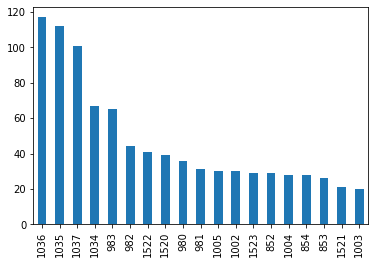

In [70]:
#Grafico de Barras
df["LojaID"].value_counts(ascending=False).plot.bar()

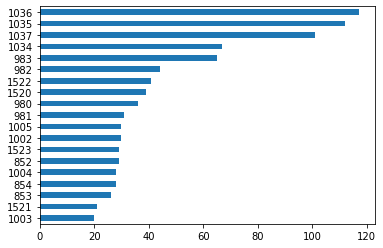

In [73]:
#Grafico de Horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

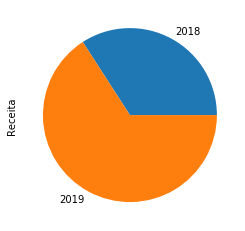

In [80]:
#Grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [82]:
#Grafico vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

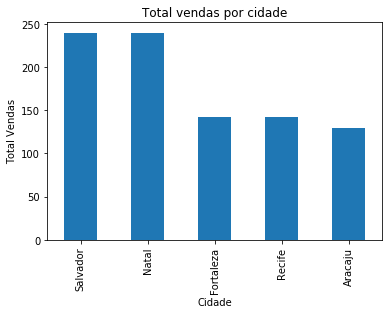

In [83]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

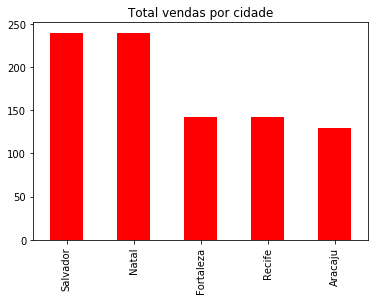

In [85]:
#Alterando a cor 
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade",color ="red")


In [88]:
#Alterando o estilo
plt.style.use("ggplot")

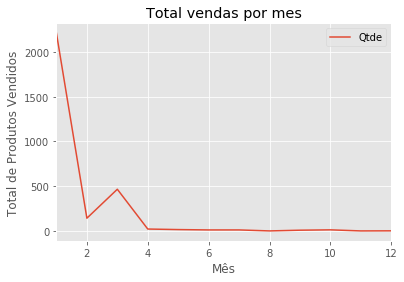

In [95]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total vendas por mes")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
]plt.legend();

In [96]:
'df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [106]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

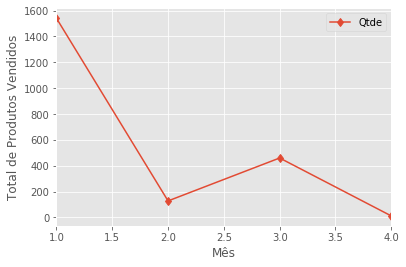

In [115]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker ="d")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend();

In [116]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

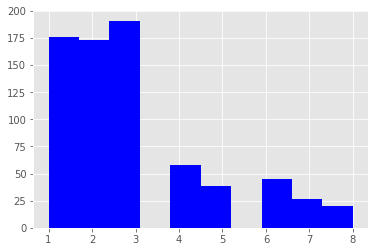

In [123]:
#Histograma
plt.hist(df_2019["Qtde"], color="b");

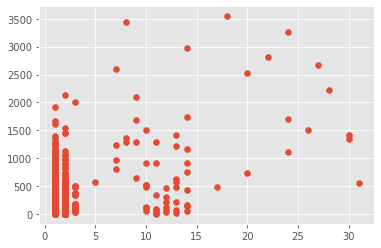

In [132]:
plt.scatter(x=df_2019["Dia_Venda"], y = df_2019["Receita"]);

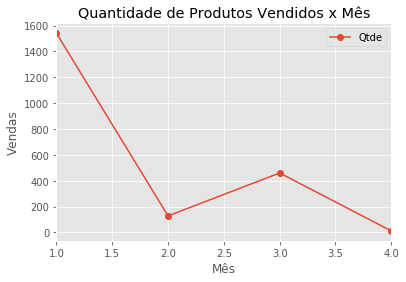

In [138]:
#Salva png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o")
plt.title("Quantidade de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.savefig("Grafico qtde x Mes.png")